# R1C1 Ecosystems Model Equilibria 

In this notebook we explore the equilibria of the one resource / one consumer (R1-C1) ecosystem model.

In [1]:
from sympy import *
init_printing()

We start by defining the variables:

In [2]:
x = Symbol('x') # biomass of resouce species [biomassX]
y = Symbol('y') # biomass of consumer species [biomassY]

We now define the parameters:

In [3]:
r = Symbol('r') # growth rate [biomassX/(biomassX*second)]
k = Symbol('k') # carrying capacity [biomassX]
a = Symbol('a') # attack rate [biomassY/biomassX]
d = Symbol('d') # death rate due to predation [biomassX/(biomassY*second)]
e = Symbol('e') # conversion efficiency [biomassY/(biomassY*second)]
h = Symbol('h') # half saturaion [biomassY]
m = Symbol('m') # mortality [biomassY/(biomassY*second)]

Finally, we define the r1-c1 equations:

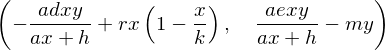

In [4]:
deltaX = r * x * (1 - (x / k)) - d * (a * y * x)/(h+a*x) # [biomassX/second]
deltaY = (e * a * y * x)/(h+a*x) - m * y                 # [biomassY/second]
deltaX, deltaY

Solving these equations for the equilibria we get:

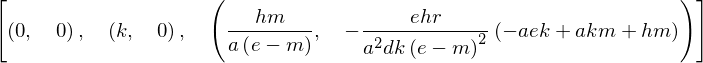

In [5]:
equilibria = solve([deltaX, deltaY], [x, y])
equilibria

The ecosystem with no resources and hence no consumers, as well as the ecosystem with only resources at their carrying capacity, are the first two, fairly obvious equilibria.

The more interesting equilibria is the third one which is highly likely to be the result of a hopf-bifurcation and the focus of the cyclycial dynamics of the overall ecosystem.

We define, $cX$ and $cY$ to be:

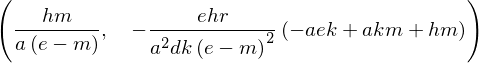

In [6]:
cX0 = equilibria[2][0]
cY0 = equilibria[2][1]
(cX0, cY0)

In [7]:
factor(deltaX.subs({ x: cX0, y: cY0}))

In [8]:
factor(deltaY.subs({ x: cX0, y: cY0}))

In these equations, the collection of the parameters, $h, a$, and $(e-m)$ seems to be an important value. To explore this, we define the constant, $\hat{h}$, as a scaled half-saturation, as follows:

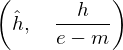

In [9]:
hHat = Symbol('\hat{h}')
hHatDef = h/(e-m)
# [biomassY*second]
#   == [biomassY]/([biomassY/(biomassY*second)] - [biomassY/(biomassY*second)])
#   == [biomassY]/([biomassY/(biomassY*second)])
#   == [biomassY] * [(biomassY*second)/biomassY]  
hHat, hHatDef

Applying this simplification to $cX$ we get

In [10]:
cX1 = cX0.subs(hHatDef, hHat) # [biomassX] == [seconds/biomassX]*[biomassY/(biomassY*second)]
cX1

Unfortunately, with out some additional work, we can only partially apply this simplificaiton to $cY$. An initial partial application gives us:

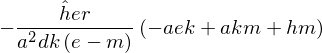

In [11]:
cY0.subs(hHatDef, hHat)

To simplify this further we need to focus upon the factor:

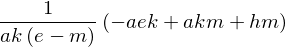

In [12]:
cYfactor0 = (-a*e*k + a*k*m + h*m)/(a*k*(e-m))
cYfactor0

We assert that $cYfactor0$ can be rewritten as:

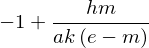

In [13]:
cYfactor1 = h*m/(a*k*(e-m)) - 1
cYfactor1

To prove this we note that:

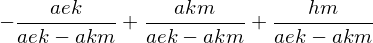

In [14]:
expand(cYfactor0)

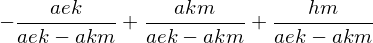

In [15]:
expand(factor(cYfactor1))

Hence:

In [16]:
expand(cYfactor0) == expand(factor(cYfactor1))

True

Applying this substitution to $cY$ we get:

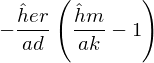

In [17]:
cY0.subs(hHatDef, hHat).subs(cYfactor0, cYfactor1).subs(hHatDef, hHat)

or after multiplying the $-1$ into $(\frac{\hat{h}m}{ak} - 1)$, we obtain:

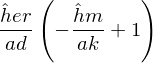

In [18]:
cY1 = ((hHat*e*r)/(a*d))*(1-hHat*m/(a*k))
cY1

Giving us the resulting cyclic equilibria:

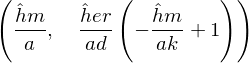

In [19]:
cX1, cY1

We note that this is only an ecologically relevant equilibria if both $0 < \hat{h}$ and $\frac{\hat{h}m}{ak} < 1$. Given the definition of $\hat{h} = \frac{h}{e-m}$, we know that $0 < \hat{h}$, only happens when $m < e$. Similarly, $\frac{\hat{h}m}{ak} < 1$ only when $\hat{h} < \frac{ak}{m}$.

## Stability about each equilibria

We now study the stability of each equlibria by looking at the jacobian of the r1-c1 equations. Recall that the equations themselves are:

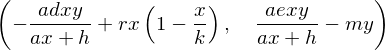

In [20]:
deltaX, deltaY

The jacobian is then:

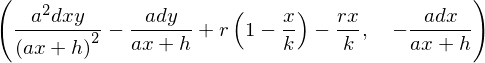

In [21]:
diff(deltaX, x), diff(deltaX, y)

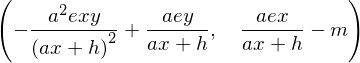

In [22]:
diff(deltaY,x), diff(deltaY,y)

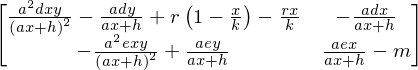

In [23]:
from sympy.matrices import *
delta = Matrix([deltaX, deltaY])
jacob = delta.jacobian([x, y])
jacob

### Stability around origin (no ecology)

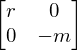

In [24]:
jacob.subs(x, 0).subs(y, 0)

In [25]:
jacob.subs(x, 0).subs(y, 0).det()

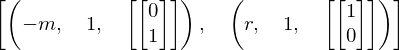

In [26]:
jacob.subs(x, 0).subs(y, 0).eigenvects()

### Stability around resources at carrying capacity

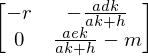

In [27]:
jacob.subs(x, k).subs(y, 0)

We consider a scaled attack rate:

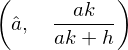

In [28]:
aHat = Symbol('\hat{a}')
aHatDef = a*k/(a*k + h)
#  [??] == ??
aHat, aHatDef

In [29]:
jacob.subs(x, k).subs(y, 0).subs(aHatDef, aHat).det()

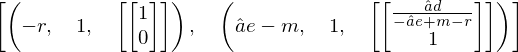

In [30]:
jacob.subs(x, k).subs(y, 0).subs(aHatDef, aHat).eigenvects()

### Stability around cyclic equilibrium

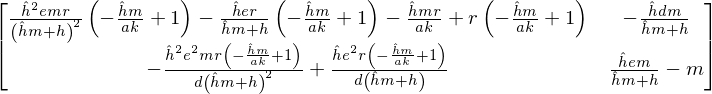

In [31]:
jacob.subs(x, cX1).subs(y, cY1)

Consider a scaled ??:

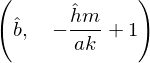

In [32]:
bHat = Symbol('\hat{b}')
bHatDef = 1 - hHat*m/(a*k)
#  [??] == ??
bHat, bHatDef

and a scaled ??:

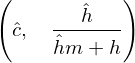

In [33]:
cHat = Symbol('\hat{c}')
cHatDef = hHat/(hHat*m+h)
#  [??] == ??
cHat, cHatDef

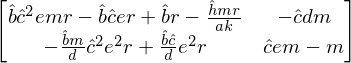

In [34]:
jacob.subs(x, cX1).subs(y, cY1).subs(bHatDef, bHat).subs(cHatDef, cHat)

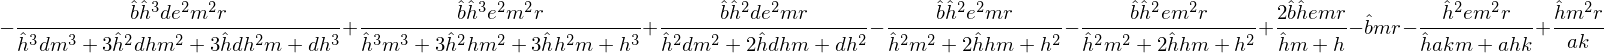

In [35]:
jacob.subs(x, cX1).subs(y, cY1).subs(bHatDef, bHat).det()

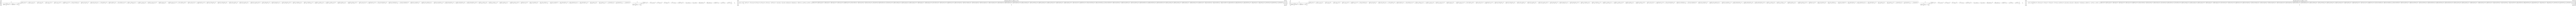

In [36]:
jacob.subs(x, cX1).subs(y, cY1).eigenvects()